<a href="https://colab.research.google.com/github/arivle/credit-card-prediction/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
url = 'https://raw.githubusercontent.com/arivle/credit-card-dataset/main/credit-card-default-1000.csv'

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df = pd.read_csv(url)
df.head()

,CUSTID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTED
0,530.0,20000.0,2,2.0,2.0,21.0,-1.0,-1.0,2.0,2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162000.0,0.0,0
1,38.0,60000.0,2,2.0,2.0,22.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1576.0,0
2,43.0,10000.0,1,2.0,2.0,22.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500.0,0
3,47.0,20000.0,2,1.0,2.0,22.0,0.0,0.0,2.0,-1.0,0.0,-1.0,1131.0,291.0,582.0,291.0,0.0,291.0,291.0,582.0,0.0,0.0,130291.0,651.0,0
4,70.0,20000.0,1,4.0,2.0,22.0,2.0,0.0,0.0,0.0,-1.0,-1.0,1692.0,13250.0,433.0,1831.0,0.0,2891.0,13250.0,433.0,1831.0,0.0,2891.0,153504.0,0


In [19]:
df["SEX"].replace({"M":"1", "F":"2"}, inplace=True)
print(df)

      CUSTID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  DEFAULTED
0      530.0    20000.0    2  ...  162000.0       0.0          0
1       38.0    60000.0    2  ...       0.0    1576.0          0
2       43.0    10000.0    1  ...       0.0    1500.0          0
3       47.0    20000.0    2  ...  130291.0     651.0          0
4       70.0    20000.0    1  ...    2891.0  153504.0          0
...      ...        ...  ...  ...       ...       ...        ...
997    103.0   480000.0    1  ...       0.0  345293.0          1
998    388.0    80000.0    1  ...       0.0    1000.0          1
999    247.0   250000.0    2  ...  100000.0   10000.0          1
1000     NaN        NaN  NaN  ...       NaN       NaN          0
1001     NaN        NaN  NaN  ...       NaN       NaN          0

[1002 rows x 25 columns]


In [20]:
df.isnull().values.any()

True

In [21]:
df.isnull().sum()

CUSTID       2
LIMIT_BAL    2
SEX          2
EDUCATION    2
MARRIAGE     2
AGE          2
PAY_1        2
PAY_2        2
PAY_3        2
PAY_4        2
PAY_5        2
PAY_6        2
BILL_AMT1    2
BILL_AMT2    2
BILL_AMT3    2
BILL_AMT4    2
BILL_AMT5    2
BILL_AMT6    2
PAY_AMT1     2
PAY_AMT2     2
PAY_AMT3     2
PAY_AMT4     2
PAY_AMT5     2
PAY_AMT6     2
DEFAULTED    0
dtype: int64

In [22]:
df = df.dropna()
df

,CUSTID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTED
0,530.0,20000.0,2,2.0,2.0,21.0,-1.0,-1.0,2.0,2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162000.0,0.0,0
1,38.0,60000.0,2,2.0,2.0,22.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1576.0,0
2,43.0,10000.0,1,2.0,2.0,22.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500.0,0
3,47.0,20000.0,2,1.0,2.0,22.0,0.0,0.0,2.0,-1.0,0.0,-1.0,1131.0,291.0,582.0,291.0,0.0,291.0,291.0,582.0,0.0,0.0,130291.0,651.0,0
4,70.0,20000.0,1,4.0,2.0,22.0,2.0,0.0,0.0,0.0,-1.0,-1.0,1692.0,13250.0,433.0,1831.0,0.0,2891.0,13250.0,433.0,1831.0,0.0,2891.0,153504.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,932.0,320000.0,1,1.0,1.0,60.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
996,367.0,50000.0,2,2.0,1.0,61.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
997,103.0,480000.0,1,1.0,1.0,63.0,0.0,0.0,0.0,2.0,-1.0,-1.0,898.0,898.0,325.0,898.0,325.0,-339603.0,898.0,325.0,898.0,325.0,0.0,345293.0,1
998,388.0,80000.0,1,3.0,1.0,73.0,-1.0,0.0,0.0,2.0,-1.0,-1.0,-109.0,-425.0,259.0,-57.0,127.0,-189.0,0.0,1000.0,0.0,500.0,0.0,1000.0,1


In [23]:
df.describe()

,CUSTID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTED
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,167080.000000,1.769000,1.60800,34.93800,-0.002000,-0.153000,-0.161000,-0.280000,-0.280000,-0.309000,49337.186000,47802.816000,44956.072000,40737.467000,38964.48600,37992.670000,5373.256000,5048.434000,4089.658000,4570.486000,5330.393000,5102.291000,0.403000
std,288.819436,130632.838668,0.721221,0.52594,9.22818,1.173616,1.230083,1.260424,1.182793,1.169174,1.204562,72658.292507,72094.412259,69560.814868,68198.059838,63073.36991,63056.507134,12186.996379,15634.443035,10171.733845,12929.410556,16820.512403,23669.363588,0.490746
min,1.000000,10000.000000,1.000000,1.00000,21.00000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,-13543.000000,-9850.000000,-3684.000000,-28335.00000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,50000.000000,1.000000,1.00000,28.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3133.250000,3260.500000,1945.250000,1441.750000,1240.50000,859.250000,1000.000000,390.000000,231.750000,149.500000,194.250000,0.000000,0.000000
50%,500.500000,140000.000000,2.000000,2.00000,33.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21111.500000,20398.000000,19295.000000,17743.000000,17539.50000,15860.000000,2148.000000,1700.000000,1200.000000,1368.000000,1304.500000,1274.000000,0.000000
75%,750.250000,240000.000000,2.000000,2.00000,41.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59405.000000,58162.750000,54133.500000,48698.000000,45890.00000,46551.000000,5086.250000,4500.000000,3705.000000,4000.000000,3739.750000,3800.000000,1.000000
max,1000.000000,700000.000000,4.000000,3.00000,75.00000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,507726.000000,509229.000000,499936.000000,628699.000000,484612.00000,473944.000000,199646.000000,285138.000000,133657.000000,188840.000000,195599.000000,528666.000000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CUSTID     1000 non-null   float64
 1   LIMIT_BAL  1000 non-null   float64
 2   SEX        1000 non-null   object 
 3   EDUCATION  1000 non-null   float64
 4   MARRIAGE   1000 non-null   float64
 5   AGE        1000 non-null   float64
 6   PAY_1      1000 non-null   float64
 7   PAY_2      1000 non-null   float64
 8   PAY_3      1000 non-null   float64
 9   PAY_4      1000 non-null   float64
 10  PAY_5      1000 non-null   float64
 11  PAY_6      1000 non-null   float64
 12  BILL_AMT1  1000 non-null   float64
 13  BILL_AMT2  1000 non-null   float64
 14  BILL_AMT3  1000 non-null   float64
 15  BILL_AMT4  1000 non-null   float64
 16  BILL_AMT5  1000 non-null   float64
 17  BILL_AMT6  1000 non-null   float64
 18  PAY_AMT1   1000 non-null   float64
 19  PAY_AMT2   1000 non-null   float64
 20  PAY_AMT3 

In [25]:
df2 = df[['CUSTID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'DEFAULTED']].copy()
df2

,CUSTID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,DEFAULTED
0,530.0,20000.0,2,2.0,2.0,21.0,0
1,38.0,60000.0,2,2.0,2.0,22.0,0
2,43.0,10000.0,1,2.0,2.0,22.0,0
3,47.0,20000.0,2,1.0,2.0,22.0,0
4,70.0,20000.0,1,4.0,2.0,22.0,0
...,...,...,...,...,...,...,...
995,932.0,320000.0,1,1.0,1.0,60.0,1
996,367.0,50000.0,2,2.0,1.0,61.0,1
997,103.0,480000.0,1,1.0,1.0,63.0,1
998,388.0,80000.0,1,3.0,1.0,73.0,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

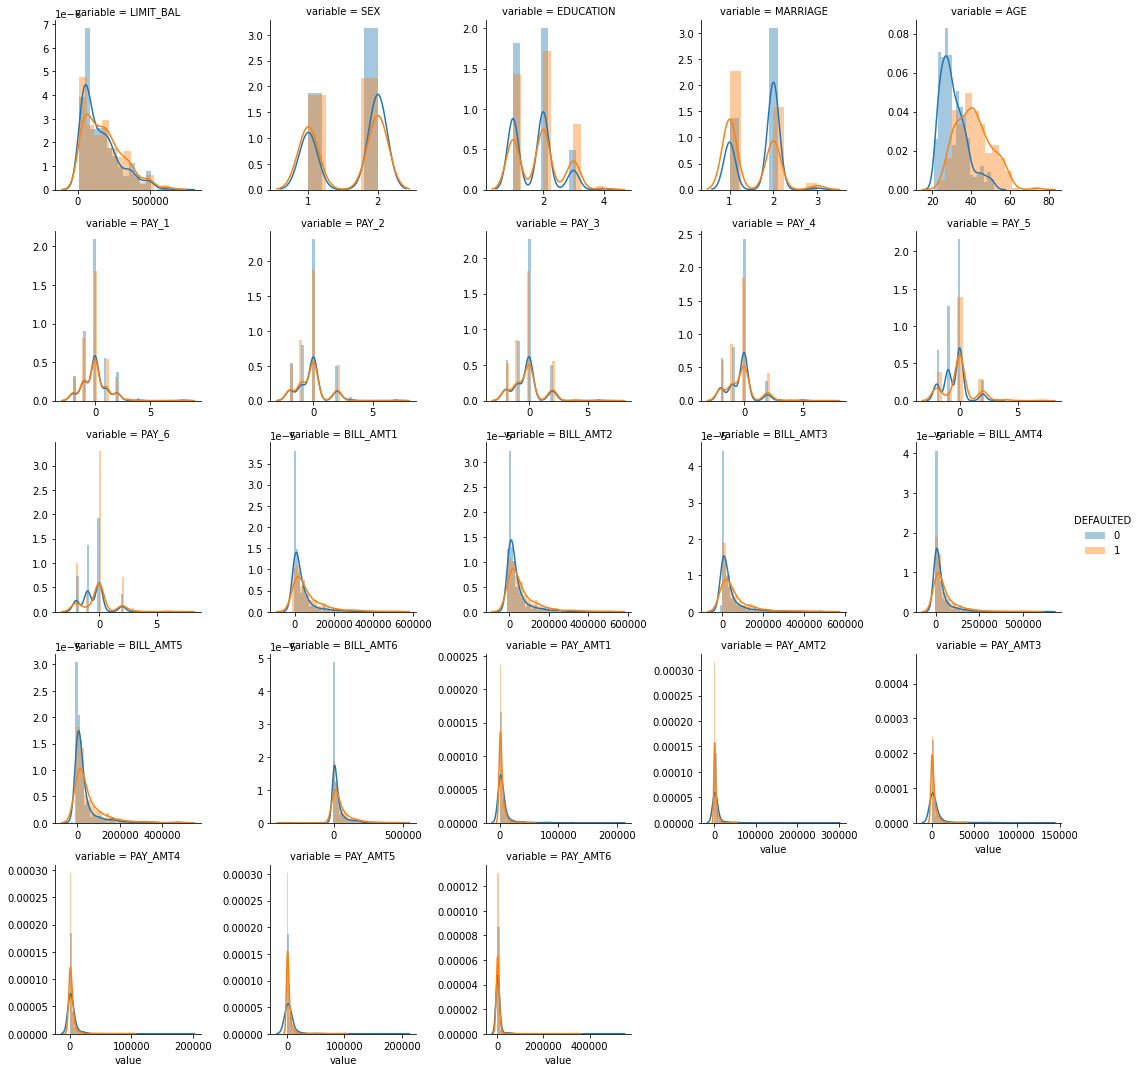

In [33]:
output = 'DEFAULTED'
cols = [ f for f in df.columns ]
cols.remove( "CUSTID")
cols.remove( output )

f = pd.melt( df, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()